**Importing Libraries and Initial Setup**

In [ ]:
#https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

pandas: Used for data manipulation and analysis (e.g., reading dataset, handling missing values)

numpy: Essential for working with arrays and performing numerical operations (e.g., replacing values)

warnings: To suppress unnecessary warnings for cleaner output.

**Loading the Dataset**

You need to have both the datasets under files section

In [ ]:
df = pd.read_csv('diabetic_data.csv');

# Display the shape and a preview of the dataset
print(f"Dataset shape: {df.shape}")

print("\nFirst 5 Records:")
df.head()

Dataset shape: (101766, 50)

First 5 Records:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO



The dataset is loaded from the diabetic_data.csv file using pandas.read_csv().

I am printing the shape and preview of the dataset to understand the structure of the data


**Exploring the data**

In [ ]:
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


Summary Statistics for Numerical Columns:
       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%     

This provides a statistical summary of the numerical columns, including:

Count: The number of non-null entries for each column.

Mean: The average value for each numerical feature, which helps identify central tendencies.

Standard Deviation: Indicates the spread or variability of the data.

Min/Max: The minimum and maximum values give insights into the range of the data.

Percentiles: These represent the lower quartile, median, and upper quartile, giving insight into the distribution of the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

This function shows the data types of each column along with the count of non-null entries. This is useful for understanding which columns are numerical (e.g., age, num_lab_procedures) and which are categorical (e.g., race, gender).

**Identifying Categorical and Numerical Columns**

In [ ]:
print('According to the data there are total 50 columns')
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(include='number')
print('Total categorical columns : ',len(df_cat.columns))
print('\nCategorical column names : ',df_cat.columns)
print('\nTotal numerical columns: ',len(df_num.columns))
print('\nNumerical column names : ',df_num.columns)

According to the data there are total 50 columns
Total categorical columns :  37

Categorical column names :  Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Total numerical columns:  13

Numerical column names :  Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medi

This tells us that out of the 50 total columns, 37 are categorical (e.g., race, gender), and 13 are numerical (e.g., age, num_lab_procedures)
It helps determine which preprocessing are necessary for the dataset.

**Visualizing Data Distributions**

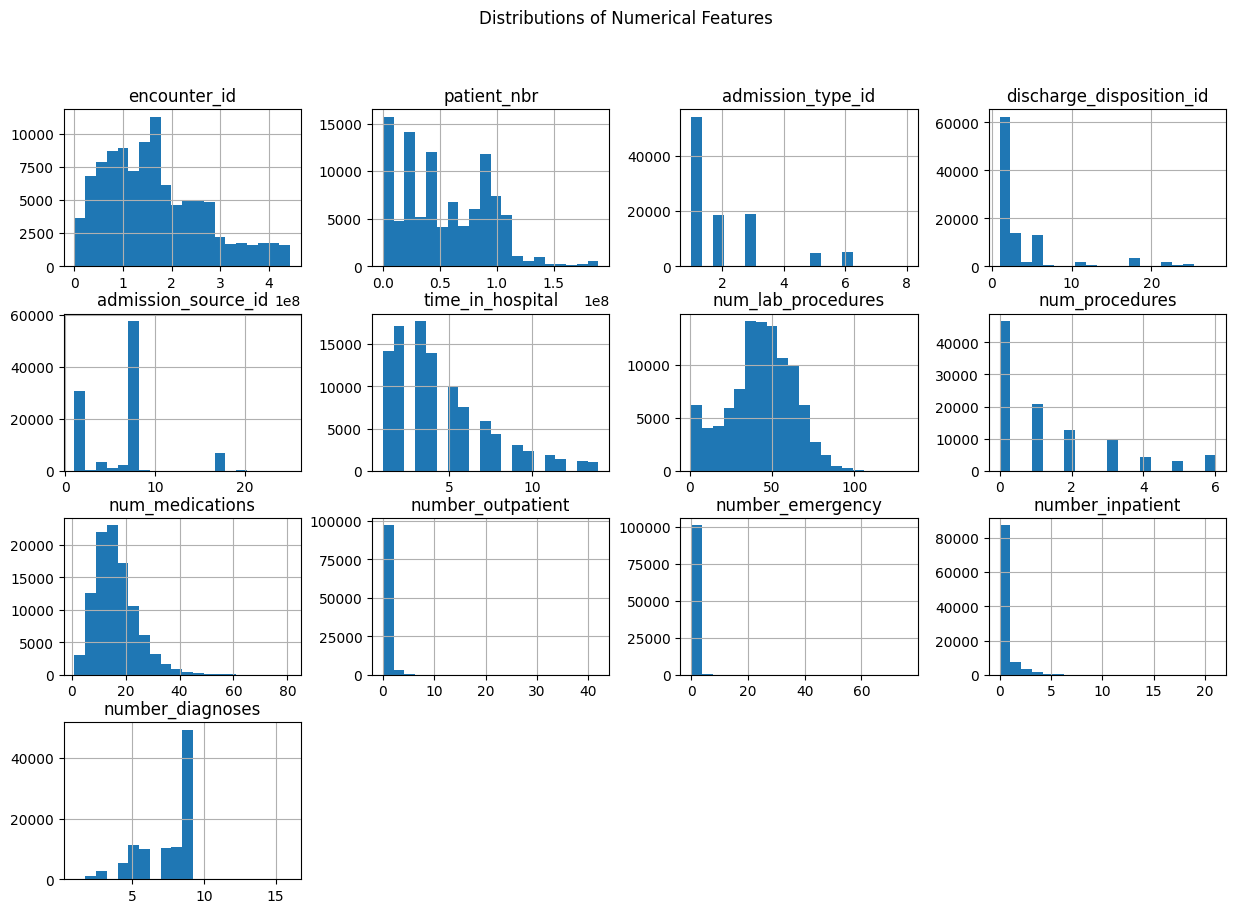

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of numerical columns
df[df_num.columns].hist(figsize=(15, 10), bins=20)
plt.suptitle("Distributions of Numerical Features")
plt.show()


This display the distribution of each numerical column in the dataset.

Observations from histogram:

Features like *num_lab_procedures* and *time_in_hospital* have skewed distributions, suggesting that most values fall in a specific range.

*number_diagnoses* seems to have a concentrated range, indicating limited variability.

*num_medications* and *number_outpatient* have long tails, suggesting potential outliers or skewed data.

*encounter_id* and *patient_nbr* are likely unique identifiers, as their histograms don't show meaningful patterns and are uniformly distributed.

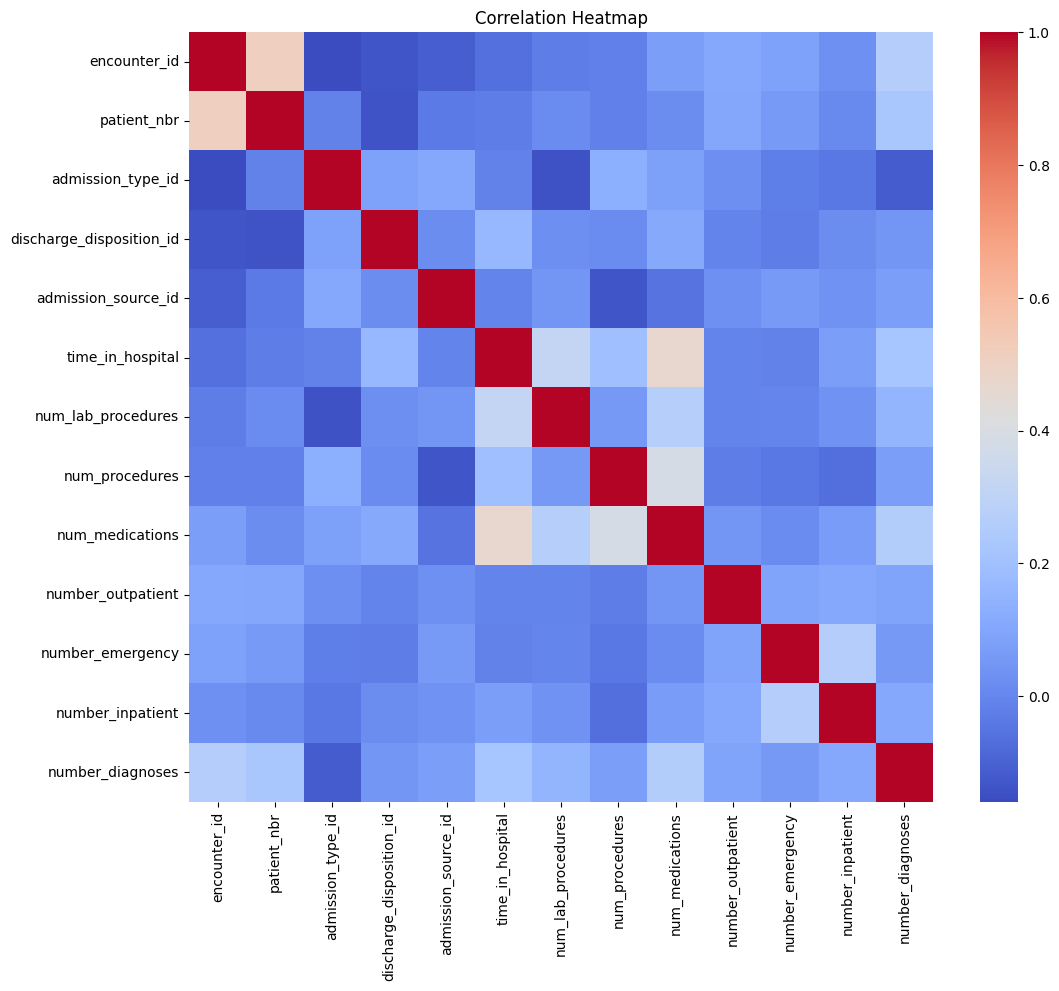

In [ ]:
# Plotting a heatmap to visualize the correlation matrix with no annotations and a 'coolwarm' color map
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

It visualizes the relationships (correlations) between features, with values ranging from -1 (strong negative) to +1 (strong positive).

**Exploring Categorical Variables**

In [ ]:
# Check for unique values and '?' in categorical columns
for col in df_cat.columns:
    print(f"{col} - Missing placeholders ('?'): {df[col].isin(['?']).sum()}")

race - Missing placeholders ('?'): 2273
gender - Missing placeholders ('?'): 0
age - Missing placeholders ('?'): 0
weight - Missing placeholders ('?'): 98569
payer_code - Missing placeholders ('?'): 40256
medical_specialty - Missing placeholders ('?'): 49949
diag_1 - Missing placeholders ('?'): 21
diag_2 - Missing placeholders ('?'): 358
diag_3 - Missing placeholders ('?'): 1423
max_glu_serum - Missing placeholders ('?'): 0
A1Cresult - Missing placeholders ('?'): 0
metformin - Missing placeholders ('?'): 0
repaglinide - Missing placeholders ('?'): 0
nateglinide - Missing placeholders ('?'): 0
chlorpropamide - Missing placeholders ('?'): 0
glimepiride - Missing placeholders ('?'): 0
acetohexamide - Missing placeholders ('?'): 0
glipizide - Missing placeholders ('?'): 0
glyburide - Missing placeholders ('?'): 0
tolbutamide - Missing placeholders ('?'): 0
pioglitazone - Missing placeholders ('?'): 0
rosiglitazone - Missing placeholders ('?'): 0
acarbose - Missing placeholders ('?'): 0
mig

Iterates over each categorical column in the dataset and checks for missing data placeholders represented by '?'. This is important because some datasets use placeholders like '?' instead of standard NaN values for missing data, and identifying these ensures proper cleaning and preprocessing before analysis

**Checking for Missing Values and Visualizing them**

In [ ]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

From the previos step, it is observed that there are some '?' values in the dataset. This step is crucial for handling missing data properly, as most data analysis and preprocessing methods recognize NaN as missing values and can handle them accordingly.

Missing values in each column:
race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
max_glu_serum        96420
A1Cresult            84748
dtype: int64


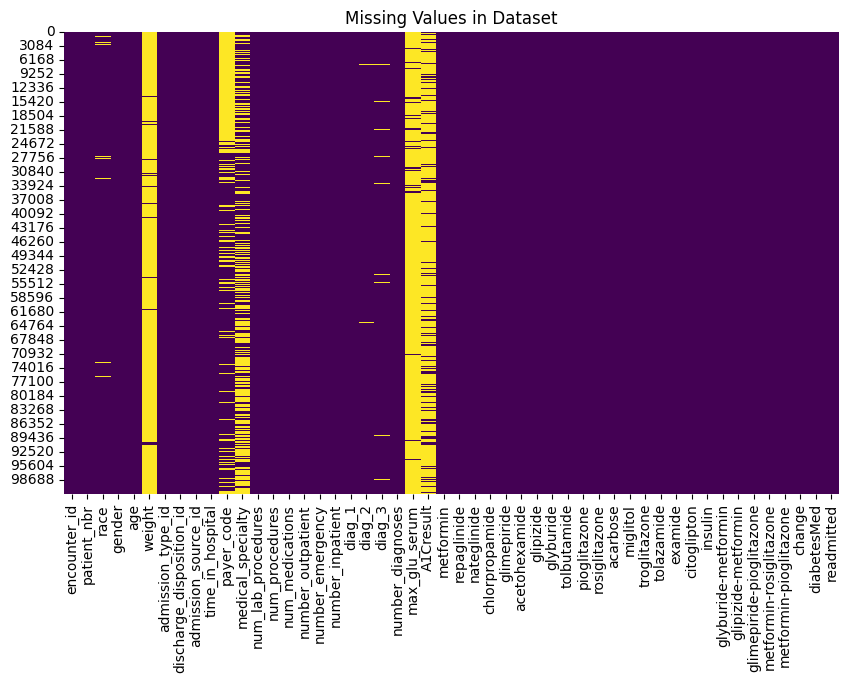

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Dataset")
plt.show()

*Column-Wise Analysis* : Columns with missing values are filtered and printed to focus on relevant data issues.

*Heatmap Visualization* : The printed results give quantitative insights, while the heatmap provides an intuitive overview of where missing data is concentrated, helping in making informed decisions for data cleaning.

**Analyze the relationship between missing columns and readmitted**

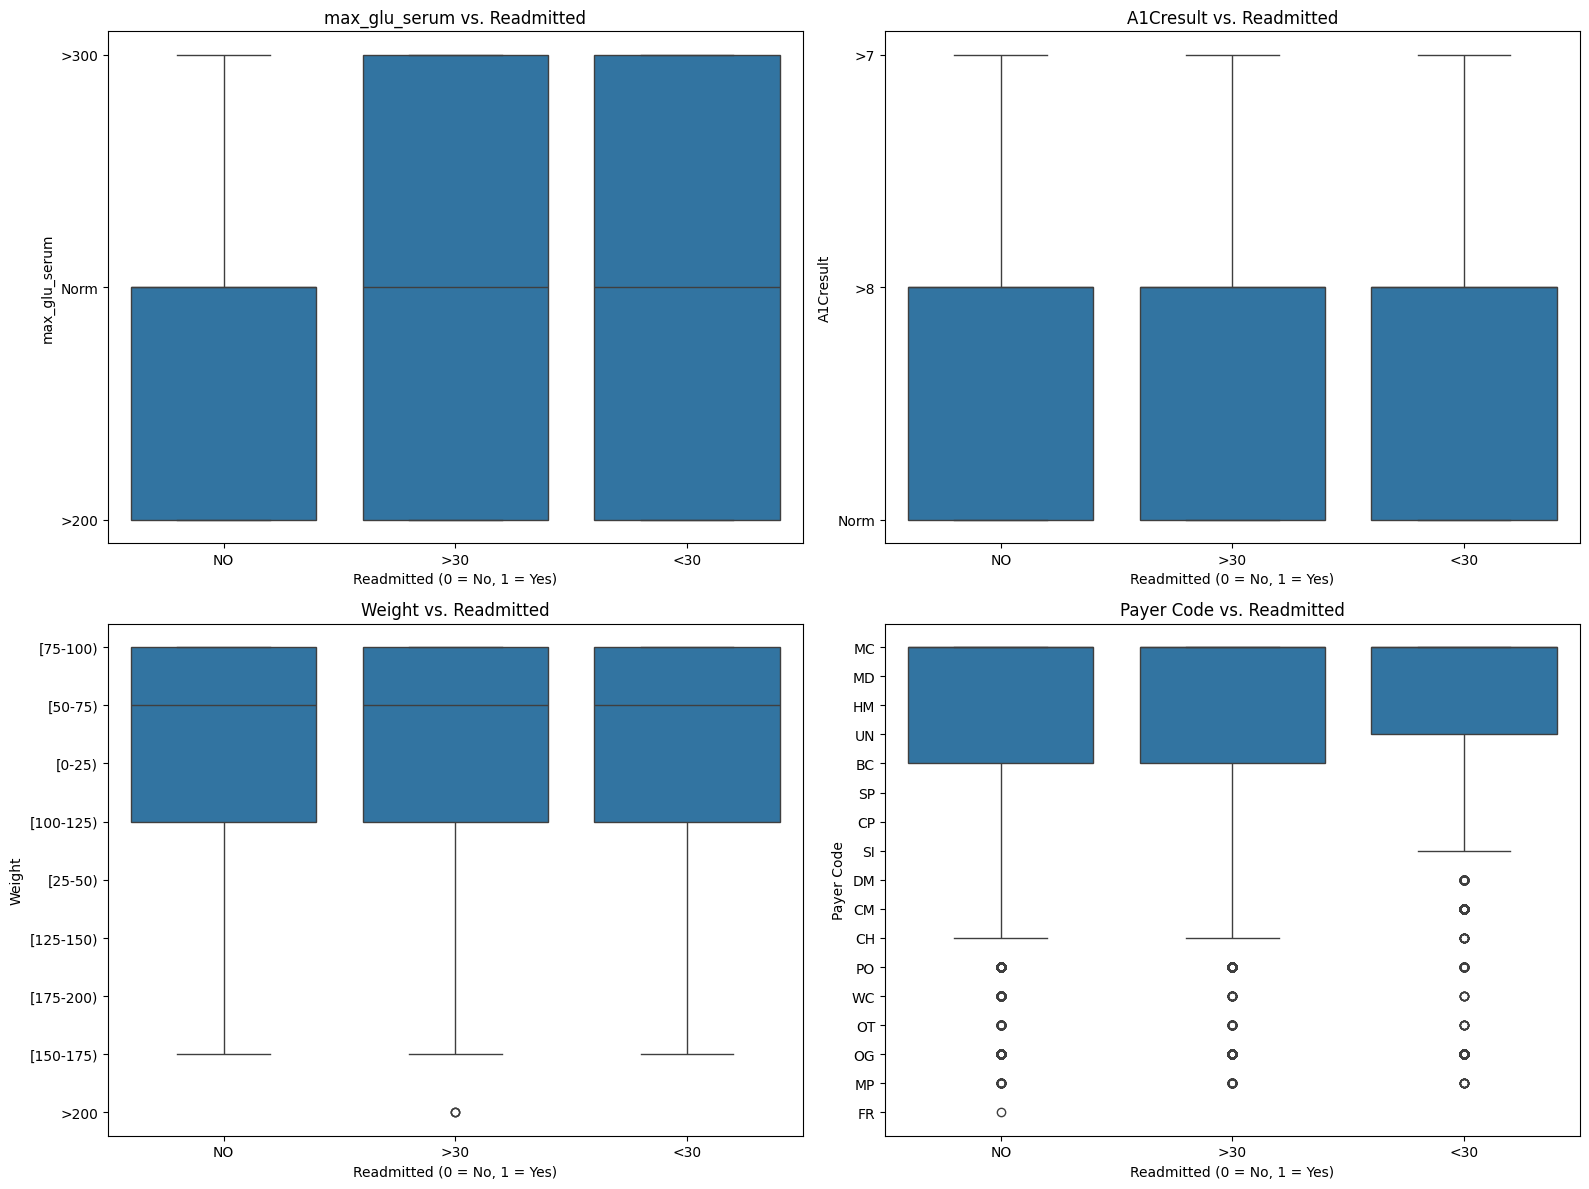

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 2 rows and 2 columns (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Boxplot for max_glu_serum
sns.boxplot(x='readmitted', y='max_glu_serum', data=df, ax=axes[0, 0])
axes[0, 0].set_title('max_glu_serum vs. Readmitted')
axes[0, 0].set_xlabel('Readmitted (0 = No, 1 = Yes)')
axes[0, 0].set_ylabel('max_glu_serum')

# Boxplot for A1Cresult
sns.boxplot(x='readmitted', y='A1Cresult', data=df, ax=axes[0, 1])
axes[0, 1].set_title('A1Cresult vs. Readmitted')
axes[0, 1].set_xlabel('Readmitted (0 = No, 1 = Yes)')
axes[0, 1].set_ylabel('A1Cresult')

# Boxplot for weight
sns.boxplot(x='readmitted', y='weight', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Weight vs. Readmitted')
axes[1, 0].set_xlabel('Readmitted (0 = No, 1 = Yes)')
axes[1, 0].set_ylabel('Weight')

# Boxplot for payer_code
sns.boxplot(x='readmitted', y='payer_code', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Payer Code vs. Readmitted')
axes[1, 1].set_xlabel('Readmitted (0 = No, 1 = Yes)')
axes[1, 1].set_ylabel('Payer Code')

# Adjust spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

To decide whether to drop the columns with missing values or not, I have shown boxplot. If the distributions for the readmitted groups overlap significantly, it indicates that missing columns has limited discriminative power.

In [ ]:
# Drop irrelevant columns having maximum missing values
df = df.drop(['weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult'], axis = 1)

Dropping the columns with maximum missing values.

**Removing Duplicates**

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"New dataset shape after removing duplicates: {df.shape}")
else:
    print("No duplicates found.")

Number of duplicate rows: 0
No duplicates found.



The duplicated() function identifies rows that are exact copies of earlier rows, and drop_duplicates() removes them if any exist.

Removing duplicates ensures cleaner data, reducing noise and enabling machine learning models to perform better.

Our results indicate that there are no duplicate rows in our dataset


**Dropping Id columns**

In [ ]:
print(df['encounter_id'].nunique())
print(df['patient_nbr'].nunique())
df.drop(['encounter_id', 'patient_nbr'],axis=1, inplace=True)

101766
71518


These columns are typically unique identifiers (e.g., encounter_id) or represent patient numbers (patient_nbr), which do not provide meaningful insights or patterns for predictive modeling.

**Exploring the Modified Dataset**

In [ ]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
race,2273
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0


Checking how many null valued columns present after partial data cleaning

**Feature Cleaning in Race Column**

*value_counts()* displays the frequency of each unique category in the race column which helps to understand the distribution of patients across different racial groups.

*unique()* returns a list of all unique values present in the race column, including NaN(if any). This highlights the diversity of the data or any inconsistencies, such as unexpected categories.

In [ ]:
# Print the count of unique values in the 'race' column before cleaning
print(df['race'].value_counts())

# Print the unique values in the 'race' column to see all distinct races present in the dataset
print(df['race'].unique())


race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']


From the results, it can be observed that majority of the dataset consists of "Caucasian" (76,099) and "AfricanAmerican" (19,210) patients, indicating these groups dominate the demographics. A small number of "Hispanic," "Other," and "Asian" patients are present, with some missing values (nan) that require handling for accurate analysis.

In [ ]:
# Impute missing/nan values for categorical columns using mode
df['race'] = df['race'].fillna(df['race'].mode()[0])

Since there are missing values (NaN) in the race column, all missing values are being replaced with the most frequently occurring value (mode) in the column. If there are multiple modes, the first mode is selected to ensure consistency.

Text(0.5, 1.0, 'Race Distribution')

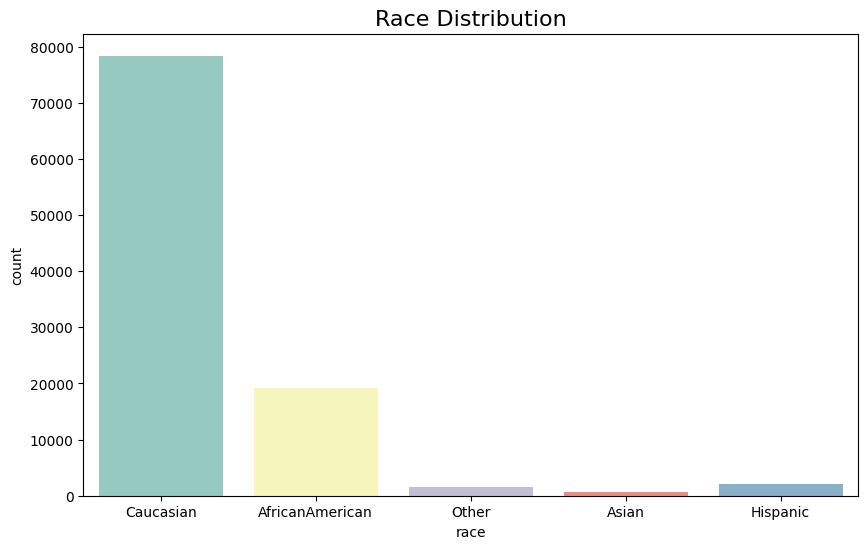

In [ ]:
# Set the figure size to 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Generate a color palette with a unique color for each race category in the 'race' column
colors = sns.color_palette("Set3", len(df['race'].unique()))  # Generate unique colors

# Create a count plot to visualize the distribution of races in the 'race' column
sns.countplot(data=df, x='race', palette=colors)

# Set the title of the plot to "Race Distribution" and adjust the font size to 16
plt.title("Race Distribution", fontsize=16)


The plot visually represents the distribution of different racial categories in the dataset. It helps identify dominant groups, underrepresented categories, and verify if the data cleaning step (e.g., replacing NaN) was performed accurately.

**Feature Cleaning and Encoding Categorical Variables in Gender Column**


In [ ]:
# Print the counts of each unique value in the 'gender' column
print(df['gender'].value_counts())

# Print the unique values in the 'gender' column before cleaning
print(df['gender'].unique())

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64
['Female' 'Male' 'Unknown/Invalid']


From the results below, it can be observed that the dataset contains a balanced distribution between Female and Male genders, with slightly more females than males. Only 3 entries are labeled as Unknown/Invalid.

In [ ]:
# Replace 'Unknown/Invalid' values in the 'gender' column with NaN
df['gender'] = df['gender'].replace('Unknown/Invalid', np.nan)

# Drop any rows with NaN values in the 'gender' column (removes invalid or missing gender entries)
df['gender'].dropna(inplace=True)

# Fill any remaining NaN values with the most frequent value (mode) in the 'gender' column
# This step is precautionary, as dropna() should remove most NaN values
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

# Print the unique values in the 'gender' column after cleaning
print(df['gender'].unique())

# Print the counts of each unique value in the 'gender' column (how many 'Female' and 'Male')
print(df['gender'].value_counts())


['Female' 'Male']
gender
Female    54711
Male      47055
Name: count, dtype: int64


After cleaning, there are only two unique values: 'Female' and 'Male'. This indicates that all invalid or missing gender data has been handled.

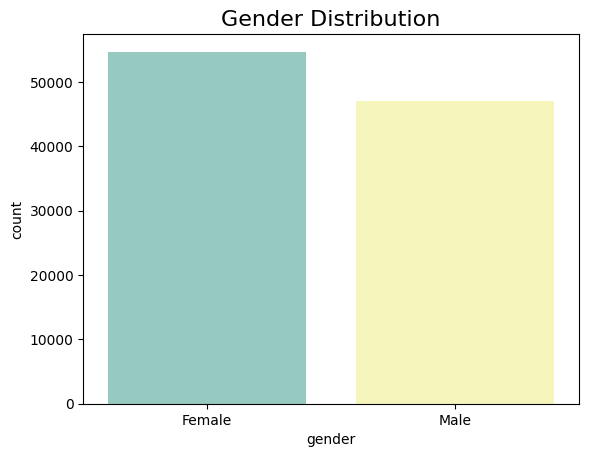

In [ ]:
# Create a count plot to visualize the distribution of gender
sns.countplot(data=df, x='gender', palette=colors)

# Set the title of the plot to "Gender Distribution" and adjust the font size
plt.title("Gender Distribution", fontsize=16)

# Show the plot
plt.show()

It shows the visual representation of gender distribution after cleaning the data.

In [ ]:
# Display the count of unique values in the 'gender' column
df['gender'].value_counts()

# Replace 'Female' with 0 and 'Male' with 1 in the 'gender' column for easier modeling
df['gender'] = df['gender'].replace({'Female' : 0, 'Male' : 1})

After this transformation, the gender column will no longer contain string values ('Female' and 'Male'). Instead, it will have numeric values (0 and 1), which can be used directly in modeling tasks. This step is often done to encode categorical variables numerically.

**Feature Transformation through Ordinal Encoding for Age Feature**


In [ ]:
# Print the counts of each unique value in the 'age' column before transformation
df['age'].value_counts()

,count
age,
[70-80),26068
[60-70),22483
[50-60),17256
[80-90),17197
[40-50),9685
[30-40),3775
[90-100),2793
[20-30),1657
[10-20),691


It can be observed that dataset is skewed towards older adults, with the majority of records in age ranges [50-80) and a smaller proportion in younger age groups. This distribution may indicate that the dataset is related to diseases or conditions more common in older populations (e.g., diabetes, chronic illnesses). The low count in [0-10), [10-20), and [20-30) suggests the dataset has minimal focus on young age group.

In [ ]:
# Replace age ranges with midpoints
df['age'] = df['age'].replace({
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
    '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75,
    '[80-90)': 85, '[90-100)': 95
})

# Print the counts of each unique value in the 'age' column after transformation
df.age.value_counts()

,count
age,
75,26068
65,22483
55,17256
85,17197
45,9685
35,3775
95,2793
25,1657
15,691


The categorical age ranges were replaced with their midpoint values to convert them into numerical data for analysis and modeling. Midpoints approximates the central value of each age group which helps in maintaining the meaning of the age range.

**Categorical Transformation and Grouping for Admission Type Feature**



In [ ]:
# Print the counts of each unique value in the 'admission_type_id' column before transformation
df['admission_type_id'].value_counts()

,count
admission_type_id,
1,53990
3,18869
2,18480
6,5291
5,4785
8,320
7,21
4,10


It is observed that *admission_type_id* column contains numerical codes representing different types of hospital admissions, along with their respective frequencies in the dataset

In [ ]:
# Read the 'IDS_mapping.csv' file into a DataFrame named ID_map
ID_map = pd.read_csv('IDS_mapping.csv')

# Select the 'admission_type_id' and 'description' columns from the DataFrame and display the first 8 rows
ID_map.loc[:, ['admission_type_id', 'description']].head(8)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


The *IDS_mapping.csv* file appears to provide a mapping of numerical *admission_type_id* codes to their respective

In [ ]:
#Emergency, Urgent and Trauma center come under single category
#Not Available, NaN and Not Mapped means the same
df['admission_type_id']=df['admission_type_id'].replace({1:'Emergency', 2 :'Emergency', 7: 'Emergency', 5: 'Not Available', 6: 'Not Available', 8: 'Not Available', 3: 'Elective', 4: 'Newborn'})
df['admission_type_id'].value_counts()

,count
admission_type_id,
Emergency,72491
Elective,18869
Not Available,10396
Newborn,10


The *admission_type_id* column now contains meaningful categories instead of numerical codes. The output of *value_counts*() will display how many entries belong to each category.

Text(0.5, 1.0, 'Admission type category Distribution')

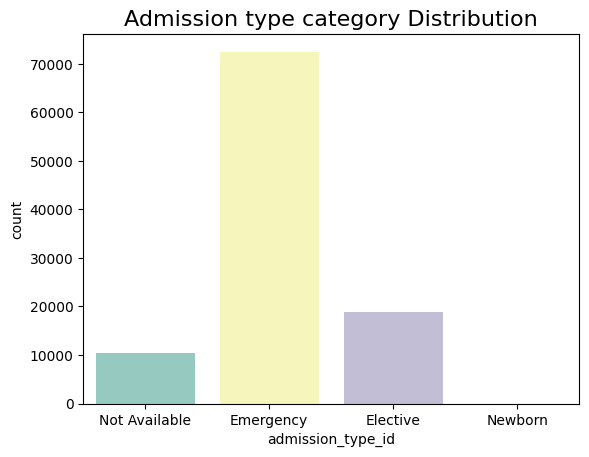

In [ ]:
#countplot to visualize the distribution of admission types in the 'admission_type_id' column
sns.countplot(data=df, x='admission_type_id', palette=colors)
plt.title("Admission type category Distribution", fontsize=16)

In [ ]:
# Drop rows from the DataFrame where the 'admission_type_id' is 'Newborn'
df.drop(df.index[df['admission_type_id'] == 'Newborn'], inplace=True)

# Display the count of each unique value in the 'admission_type_id' column after removing 'Newborn' records
df['admission_type_id'].value_counts()

,count
admission_type_id,
Emergency,72491
Elective,18869
Not Available,10396


The Newborn category was removed because it had only 10 entries, which is a small portion of the total dataset.

**Categorical Transformation and Grouping for discharge disposition feature**


In [ ]:
ID_map.loc[9:, ['admission_type_id', 'description']].head(30)

,admission_type_id,description
9,discharge_disposition_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital


The IDS_mapping.csv file appears to provide a mapping of numerical discharge_disposition_id codes to their respective.

In [ ]:
# function to categorize discharge dispositions
def categorize_discharge(disposition_id):
    if disposition_id in [1, 6, 8]:
        return 'Discharged to home'
    elif disposition_id in [2, 3, 4, 5, 16, 22, 23, 24, 27, 28, 29, 30]:
        return 'Transferred to another facility'
    elif disposition_id == 7:
        return 'Left AMA'  # Left Against Medical Advice
    elif disposition_id in [9, 12, 15, 17]:
        return 'Still patient/referred to this institution'
    elif disposition_id == 10:
        return 'Neonate discharged'
    elif disposition_id in [11, 19, 20, 21]:
        return 'Expired'
    elif disposition_id in [13, 14]:
        return 'Hospice'
    elif disposition_id in [18, 25, 26]:
        return 'Not Available'
    else:
        return 'Unknown'

# Apply the function to the 'discharge_disposition_id' column
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(categorize_discharge)
df['discharge_disposition_id'].value_counts()

,count
discharge_disposition_id,
Discharged to home,73234
Transferred to another facility,20689
Not Available,4680
Expired,1652
Hospice,771
Left AMA,623
Still patient/referred to this institution,101
Neonate discharged,6


Grouping and categorizing discharge_disposition_id values into broader categories is done based on their meanings. The purpose of grouping some of the original discharge dispositions into fewer categories is to simplify the data and ensure that the values are meaningful for analysis.

In [ ]:
df=df[df['discharge_disposition_id']!='Expired']
df=df[df['discharge_disposition_id']!='Neonate discharged']
df=df[df['discharge_disposition_id']!='Hospice']

Some categories are excluded because of their irrelevance.

*Expired*: Patients who have passed away are excluded because they may not be relevant for predictive modeling or analysis focused on ongoing treatments or readmissions.

*Neonate discharged*: The neonate category is excluded because it refers to newborns, and the analysis might be targeting adult patients or specific medical conditions that don't apply to neonates.

*Hospice*: Patients in hospice care are typically at the end of their life, and removing them might be necessary if the analysis is focused on active treatment or recovery.

**Categorical Transformation and Grouping for admission source feature**


In [ ]:
ID_map.loc[41:, ['admission_type_id', 'description']].head(15)

,admission_type_id,description
41,admission_source_id,description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement
50,9,Not Available


The result displays a mapping between admission_type_id and description, where each ID corresponds to a specific type of admission source related to how the patient was admitted.

In [ ]:
# Define a function to categorize admission source
def categorize_admission_source(source_id):
    if source_id in [1, 2, 3]:
        return 'Referral'
    elif source_id in [4, 5, 6, 10, 18, 19, 22, 25, 26]:
        return 'Transferred from hospital'
    elif source_id in [7, 8]:
        return 'Emergency'
    elif source_id in [9, 15, 17, 20, 21]:
        return 'Not Available'
    elif source_id in [11, 12, 13, 14, 23, 24]:
        return 'Delivery'
    else:
        return 'Unknown'

# Apply the function to the 'admission_source_id' column
df['admission_source_id'] = df['admission_source_id'].apply(categorize_admission_source)
df['admission_source_id'].value_counts()

,count
admission_source_id,
Emergency,55860
Referral,30429
Not Available,6854
Transferred from hospital,6180
Delivery,4


Grouping and categorizing *admission_source_id* values into broader categories is done based on their meanings. The purpose of grouping some of the original admission_source_id into fewer categories is to simplify the data and ensure that the values are meaningful for analysis.

Text(0.5, 1.0, 'Admission source category distribution')

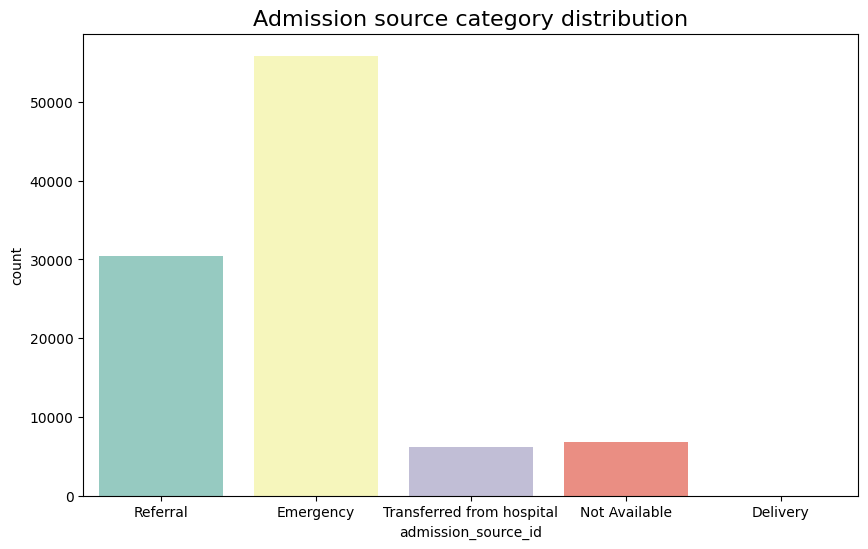

In [ ]:
#countplot to visualize the distribution of admission source category in the 'admission_type_id' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='admission_source_id', palette=colors)
plt.title("Admission source category distribution", fontsize=16)

In [ ]:
df=df[df['admission_source_id']!='Delivery']

Since there are only 4 such records, they do not provide sufficient data for meaningful statistical analysis or model training and may introduce noise or bias in the results.

**Feature Engineering for other columns**

In [ ]:
# Find the range of lab tests a patient has undergone to understand variability and detect potential outliers
print('The number of lab tests a patient has undergone can range from', df.num_lab_procedures.min(), 'to', df.num_lab_procedures.max())

# Find the range of medications prescribed to identify variability and ensure the data is consistent
print('The number of medications range from a minimum of', df.num_medications.min(), 'to maximum of', df.num_medications.max())

The number of lab tests a patient has undergone can range from 1 to 132
The number of medications range from a minimum of 1 to maximum of 81


In [ ]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,0,5,Not Available,Not Available,Referral,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,0,15,Emergency,Discharged to home,Emergency,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,0,25,Emergency,Discharged to home,Emergency,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,1,35,Emergency,Discharged to home,Emergency,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,1,45,Emergency,Discharged to home,Emergency,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


It can be observed that missing and irrelevant data have been removed or handled, categorical columns like age and medications have been transformed into numerical or simplified formats and rows with irrelevant categories ("Expired," "Delivery," etc.) have been excluded, ensuring the data is relevant to the readmission analysis.

In [ ]:
# Combine outpatient, emergency, and inpatient visits
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']
df.drop(['number_outpatient', 'number_emergency', 'number_inpatient'], axis=1, inplace=True)

The combined column, *service_utilization*, provides a single metric representing the total number of healthcare visits, which can be more informative than analyzing each type separately.

In [ ]:
# Fill missing values (NaN) in with the most frequent value (mode) in the column
df['diag_1'] = df['diag_1'].fillna(df['diag_1'].mode()[0])
df['diag_2'] = df['diag_2'].fillna(df['diag_2'].mode()[0])
df['diag_3'] = df['diag_3'].fillna(df['diag_3'].mode()[0])

Filling missing values with the mode which is the most common diagnosis to ensure the dataset remains intact without introducing too much bias or noise.

In [ ]:
df.isnull().sum()

,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0


From the results, it can be observed that there are no null values present in the dataframe.

**Encoding Readmitted column**

In [ ]:
# Replace categorical values in 'readmitted' column
df['readmitted'] = df['readmitted'].replace({'>30' : 0, 'NO' : 0, '<30' : 1})

# Display the count of each unique value in the 'readmitted' column
df['readmitted'].value_counts()

,count
readmitted,
0,88010
1,11313


The results shows how many instances of 0 (no readmission or readmission after 30 days) and 1 (readmission within 30 days) are present in the dataset. This gives insight into the distribution of readmission events in the dataset.

**Encoding Diabetes Medication Information**

In [ ]:
# Display the counts of each category in the 'diabetesMed' column
print(df['diabetesMed'].value_counts())

# Replace categorical values in the 'diabetesMed' column with numeric values
df['diabetesMed'] = df['diabetesMed'].replace({'Yes': 1, 'No': 0})

diabetesMed
Yes    76703
No     22620
Name: count, dtype: int64


After replacing, the 'diabetesMed' column will have 1 for patients on medication and 0 for those not on medication.

**Encoding Change in Medication or Treatment**

In [ ]:
# Display the counts of each category in the 'change' column
print(df['change'].value_counts())

# Replace categorical values in the 'change' column with numeric values
df['change'] = df['change'].replace({'No': 0, 'Ch': 1})

change
No    53206
Ch    46117
Name: count, dtype: int64


**Encoding Drug List**

In [ ]:
# Create a list of column names for drugs (from columns 16 to 38, inclusive)
drug = list(df.iloc[:, 16:39].columns)
drug

['nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

It creates a list of drug-related columns, which can be further analyzed to explore how different drugs or treatments are distributed across patients in the dataset.

In [ ]:
#Print the column name along with the unique values it contains
for i in drug:
  print(i, df[i].unique())

nateglinide ['No' 'Steady' 'Down' 'Up']
chlorpropamide ['No' 'Steady' 'Down' 'Up']
glimepiride ['No' 'Steady' 'Down' 'Up']
acetohexamide ['No' 'Steady']
glipizide ['No' 'Steady' 'Up' 'Down']
glyburide ['No' 'Steady' 'Up' 'Down']
tolbutamide ['No' 'Steady']
pioglitazone ['No' 'Steady' 'Up' 'Down']
rosiglitazone ['No' 'Steady' 'Up' 'Down']
acarbose ['No' 'Steady' 'Up' 'Down']
miglitol ['No' 'Steady' 'Down' 'Up']
troglitazone ['No' 'Steady']
tolazamide ['No' 'Steady' 'Up']
examide ['No']
citoglipton ['No']
insulin ['No' 'Up' 'Steady' 'Down']
glyburide-metformin ['No' 'Steady' 'Down' 'Up']
glipizide-metformin ['No' 'Steady']
glimepiride-pioglitazone ['No' 'Steady']
metformin-rosiglitazone ['No' 'Steady']
metformin-pioglitazone ['No' 'Steady']
change [0 1]
diabetesMed [0 1]


In [ ]:
for i in drug:
  print((df[i].value_counts(normalize=True)*100))
  print("\n" + "-"*50 + "\n")

nateglinide
No        99.306304
Steady     0.658458
Up         0.024164
Down       0.011075
Name: proportion, dtype: float64

--------------------------------------------------

chlorpropamide
No        99.915427
Steady     0.077525
Up         0.006041
Down       0.001007
Name: proportion, dtype: float64

--------------------------------------------------

glimepiride
No        94.844095
Steady     4.639409
Up         0.324195
Down       0.192302
Name: proportion, dtype: float64

--------------------------------------------------

acetohexamide
No        99.998993
Steady     0.001007
Name: proportion, dtype: float64

--------------------------------------------------

glipizide
No        87.385601
Steady    11.293457
Up         0.769208
Down       0.551735
Name: proportion, dtype: float64

--------------------------------------------------

glyburide
No        89.407287
Steady     9.222436
Up         0.806460
Down       0.563817
Name: proportion, dtype: float64

-----------------------

This code calculates the normalized value counts for each of the specified columns

In [ ]:
for i in drug:
  df[i]= df[i].apply(lambda x: 0 if (x== 'No' or x == 'Steady') else 1)

df['metformin'] = df['metformin'].replace({'No': 0, 'Steady': 0, 'Up': 1, 'Down': 1})
df['repaglinide'] = df['repaglinide'].replace({'No': 0, 'Steady': 0, 'Up': 1, 'Down': 1})

**One-Hot Encoding of the 'Race' Column**

In [ ]:
# Create dummy variables for the 'race' column using one-hot encoding
race_dummies = pd.get_dummies(df['race'], drop_first=True)

# Concatenate the newly created dummy variables with the original dataframe (df)
df = pd.concat([df, race_dummies], axis=1)

# Drop the original 'race' column as it is no longer needed after creating the dummy variables
df.drop(['race'], inplace=True, axis=1)

# Display the first few rows of the modified dataframe to verify the changes
df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization,Asian,Caucasian,Hispanic,Other
0,0,5,Not Available,Not Available,Referral,1,41,0,1,250.83,...,0,0,1,1,0,0,False,True,False,False
1,0,15,Emergency,Discharged to home,Emergency,3,59,0,18,276,...,0,0,1,1,0,0,False,True,False,False
2,0,25,Emergency,Discharged to home,Emergency,2,11,5,13,648,...,0,0,1,1,0,3,False,False,False,False
3,1,35,Emergency,Discharged to home,Emergency,2,44,1,16,8,...,0,0,1,1,0,0,False,True,False,False
4,1,45,Emergency,Discharged to home,Emergency,1,51,0,8,197,...,0,0,1,1,0,0,False,True,False,False


One-hot encoding creates binary features for each category, making them usable for machine learning models.

**Label Encoding for Diagnosis Columns**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop through the three diagnosis columns: 'diag_1', 'diag_2', 'diag_3'
for col in ['diag_1', 'diag_2', 'diag_3']:
    # Replace NaN (missing values) with 'Unknown' to handle missing data before encoding
    df[col] = df[col].fillna('Unknown')
    # Apply label encoding to convert categorical values into numeric labels
    df[col] = label_encoder.fit_transform(df[col])

Initially missing values are replaced with 'Unknown' to ensure that no missing data interferes with the label encoding process. Categorical values(e.g., diagnosis codes like 250, 401, or V45) are converted into numeric labels (e.g., 0, 1, 2).

**Visualizing Readmission Distribution for Outcome Analysis**

Text(0.5, 1.0, 'Readmitted distribution')

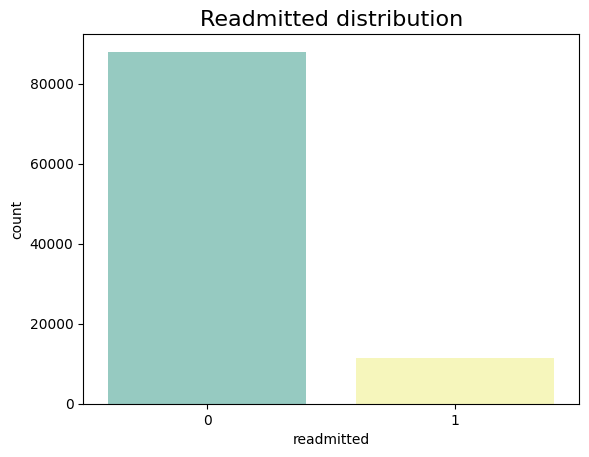

In [ ]:
#A countplot helps to understand the frequency of each category in the 'readmitted' column
sns.countplot(data=df, x='readmitted', palette=colors)
plt.title("Readmitted distribution", fontsize=16)

In [ ]:
df['readmitted'].value_counts()

,count
readmitted,
0,88010
1,11313


The *df['readmitted'].value_counts()* returns the count of occurrences for each unique value in the readmitted column. This helps us understand the distribution of patients based on whether they were readmitted or not.

**Encoding Categorical Variables into Numerical Format**

In [ ]:
# Replace categorical values in 'admission_type_id' with numerical labels
df['admission_type_id'] = df['admission_type_id'].replace({'Emergency': 0, 'Elective': 1, 'Not Available': 2})

# Replace categorical values in 'discharge_disposition_id' with numerical labels
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace({
    'Discharged to home': 0,
    'Transferred to another facility': 1,
    'Not Available': 2,
    'Left AMA': 3,
    'Still patient/referred to this institution': 4
})

# Replace categorical values in 'admission_source_id' with numerical labels
df['admission_source_id'] = df['admission_source_id'].replace({
    'Emergency': 0,
    'Referral': 1,
    'Not Available': 2,
    'Transferred from hospital': 3
})

Numerical encoding allows models to interpret categorical data effectively while maintaining the underlying meaning of the categories. By converting categories into integers, the data is standardized and ready for analysis or model training.

**Feature Selection**

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of all features with the target variable 'readmitted'
cor_target = correlation_matrix['readmitted'].sort_values(ascending=False)
threshold = 0.01

# Select features based on the threshold
selected_features = cor_target[cor_target.abs() > threshold].index.tolist()
selected_features.remove('readmitted')
selected_features_df = cor_target[selected_features]

In [ ]:
# List of columns with NaN correlations
columns_to_drop = [
    'acetohexamide', 'tolbutamide', 'troglitazone', 'examide', 'citoglipton',
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone', 'change', 'diabetesMed'
]

# Drop these columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop)

Dropping the columns which don't have much correlation with target variable

In [ ]:
# Display the first few rows of the updated DataFrame
df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization,Asian,Caucasian,Hispanic,Other
0,0,5,2,2,1,1,41,0,1,124,...,0,0,1,1,0,0,False,True,False,False
1,0,15,0,0,0,3,59,0,18,143,...,0,0,1,1,0,0,False,True,False,False
2,0,25,0,0,0,2,11,5,13,454,...,0,0,1,1,0,3,False,False,False,False
3,1,35,0,0,0,2,44,1,16,554,...,0,0,1,1,0,0,False,True,False,False
4,1,45,0,0,0,1,51,0,8,54,...,0,0,1,1,0,0,False,True,False,False


**Building models and evaluating techniques**


In [ ]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y) from the dataset
X = df.drop('readmitted', axis=1)
y = df.readmitted

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (69526, 43)
y_train (69526,)
X_test (29797, 43)
y_test (29797,)


Dataset was splitted into 70% training and 30% testing.

In [ ]:
scores = pd.DataFrame(columns=['Model_Name', 'Test_Accuracy', 'Test_f1', 'Test_precision', 'Test_recall', 'Test_auc_roc'])

This initializes an empty Pandas DataFrame named scores with predefined column names to store evaluation metrics for various machine learning models.

**Double-Check Missing Values in Features**

In [ ]:
from sklearn.impute import SimpleImputer

# Replace 'mean' with 'median' or 'most_frequent' as needed
imputer = SimpleImputer(strategy='mean')

# Replace missing values in the training-testing data with the computed mean
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

Even if missing values are handled previously, this step guarantees that all columns used in modeling are free of missing values after the train-test split.

**Function regarding evaluation metric**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score

def evaluate_model(pipe, X_train, y_train, X_test, y_test, model_name="Model"):
    # Train the model
    pipe.fit(X_train, y_train)
    print(model_name+":")

    # Training Accuracy
    tr_acc = pipe.score(X_train, y_train)
    print(f"Training Accuracy: {tr_acc}")

    # Testing Accuracy
    te_acc = pipe.score(X_test, y_test)
    print(f"Testing Accuracy: {te_acc}")

    # Cross-validation score
    score = cross_val_score(estimator=pipe, X=X_train, y=y_train, scoring='accuracy', cv=5)
    print('Cross validation score', np.mean(score))

    # Predictions
    pred = pipe.predict(X_test)

    # Metrics for Test Data
    test_conf_matrix = confusion_matrix(y_test, pred)
    print(f"Confusion Matrix (Test):\n{test_conf_matrix}")
    test_class_report = classification_report(y_test, pred)
    print(f"Classification Report (Test):\n{test_class_report}")
    test_precision = precision_score(y_test, pred)
    test_recall = recall_score(y_test, pred)
    test_f1 = f1_score(y_test, pred)
    test_roc_auc = roc_auc_score(y_test, pred)

    # Collect results in a pandas Series
    add = pd.Series({
        'Model_Name': model_name,
        'Test_Accuracy': te_acc,
        'Test_f1': test_f1,
        'Test_recall': test_recall,
        'Test_precision': test_precision,
        'Test_auc_roc': test_roc_auc
    })

    # Append results to global scores DataFrame
    global scores
    scores = pd.concat([scores, pd.DataFrame([add])], ignore_index=True)

    return scores

from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test):
    # Predicting probabilities for the positive class (1)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

The function is useful for training a model, evaluating its performance on multiple metrics, and storing the results for future comparison.

**Model 1: Logistic Regression**

Logistic Regression predicts whether a patient will be readmitted or not. It gives probabilities and makes a decision based on them.

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Logistic Regression:
Training Accuracy: 0.6432413773264678
Testing Accuracy: 0.643890324529315
Cross validation score 0.6431551083757368
Confusion Matrix (Test):
[[17405  8988]
 [ 1623  1781]]
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      0.66      0.77     26393
           1       0.17      0.52      0.25      3404

    accuracy                           0.64     29797
   macro avg       0.54      0.59      0.51     29797
weighted avg       0.83      0.64      0.71     29797



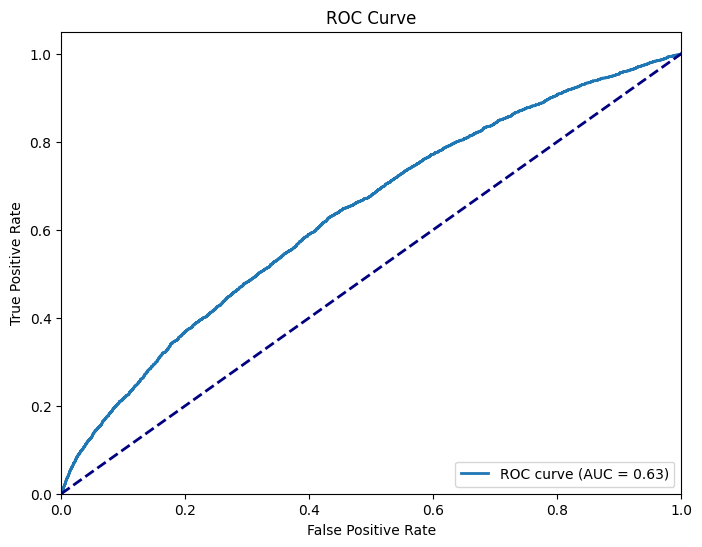

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the Logistic Regression model
lr_model = LogisticRegression(class_weight="balanced", random_state=42)

# Define hyperparameters for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],          # Regularization strength
    'penalty': ['l2'],                # Using L2 regularization (default)
    'solver': ['liblinear', 'saga'],  # Suitable solvers for small datasets
    'max_iter': [100, 200, 300]       # Maximum iterations for convergence
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lr_model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the model using the existing evaluate_model function
evaluate_model(best_model, X_train, y_train, X_test, y_test, model_name="Logistic Regression")


# Plot the ROC curve for the best model
plot_roc_curve(best_model, X_test, y_test)

**Performance Summary:**

*Accuracy*: The model correctly predicts about 64% of the cases, slightly better than guessing everyone as "not readmitted."

*Recall for Readmissions*: It catches about 52% of actual readmissions, which is decent.

*Precision for Readmissions*: Only 16% of its predictions for "readmitted" are correct, meaning it often falsely predicts patients will be readmitted.

**Confusion Matrix:**:

For *patients not readmitted*: It does well but misses some.
For *patients readmitted*: It finds most but predicts "readmitted" for many who aren't, leading to false positives.

One of the good thing about this model is it's performance is consistent across training, testing, and cross-validation. One of the drawback of the model here is it shows too many false alarms for readmissions (low precision). Overall, it doesn't perform much better than a basic guess.


---



**Model 2: Decision Tree Classifier**

The Decision Tree Classifier splits data into smaller groups based on conditions, creating a tree structure to classify whether a patient will be readmitted or not.

Tried hyperparameter tuning but removed it as it takes long time to process

Decision Tree Classifier:
Training Accuracy: 0.8958891215086745
Testing Accuracy: 0.8519649629157298
Cross validation score 0.8926112007889138
Confusion Matrix (Test):
[[24909  1484]
 [ 2927   477]]
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     26393
           1       0.24      0.14      0.18      3404

    accuracy                           0.85     29797
   macro avg       0.57      0.54      0.55     29797
weighted avg       0.82      0.85      0.83     29797



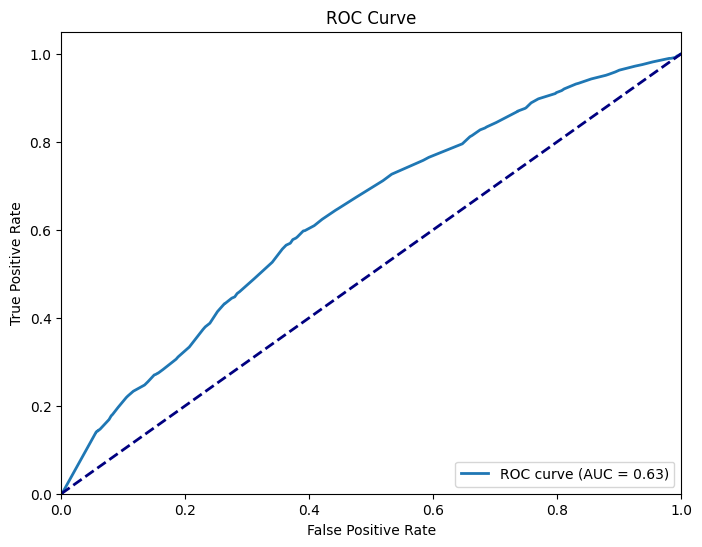

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    max_depth=10,                # Restrict tree depth to prevent overfitting
    min_samples_split=5,         # Minimum samples to split a node
    min_samples_leaf=5,          # Minimum samples required in a leaf node
    criterion='gini',            # Use Gini impurity as the splitting criterion
    class_weight='balanced',     # Handle class imbalance by assigning weights to classes
    random_state=42              # Ensure reproducibility
)

# Use the evaluate_model function directly
evaluate_model(dt_model, X_train_smote, y_train_smote, X_test, y_test, model_name="Decision Tree Classifier")

# Plot the ROC curve using your existing function
plot_roc_curve(dt_model, X_test, y_test)


**Performance Summary:**

*Accuracy*: 85% (Good overall prediction rate, but mostly for non-readmitted patients).

*Recall for Readmissions*: 14% (The model identifies very few actual readmissions).

*Precision for Readmissions*: 24% (Most predictions for "readmitted" are incorrect).

**Confusion Matrix:**

For *patients not readmitted*: Correctly predicts most cases

For *patients readmitted*: Fails to detect most cases, with many missed readmissions

Some good things about this model is it has high accuracy for predicting "not readmitted" patients and had good precision and recall for the majority class (non-readmitted). Some drawbacks include having extremely low recall for readmitted patients, meaning it misses most of them.

The model is reliable for identifying non-readmitted patients but performs poorly in detecting actual readmissions.


---



**Model 3: XGB Classifier**

The XGBoost Classifier is a powerful gradient boosting algorithm that combines multiple weak decision tree models to improve predictive performance. It optimizes classification by iteratively focusing on the hardest-to-predict samples. In this case, it has been tuned to handle class imbalance using scale_pos_weight.

Tried hyperparameter tuning but removed it as it takes long time to process

XGB Classifier:
Training Accuracy: 0.8833033091516952
Testing Accuracy: 0.7667214820283921
Cross validation score 0.82241132612006
Confusion Matrix (Test):
[[21586  4807]
 [ 2144  1260]]
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      0.82      0.86     26393
           1       0.21      0.37      0.27      3404

    accuracy                           0.77     29797
   macro avg       0.56      0.59      0.56     29797
weighted avg       0.83      0.77      0.79     29797



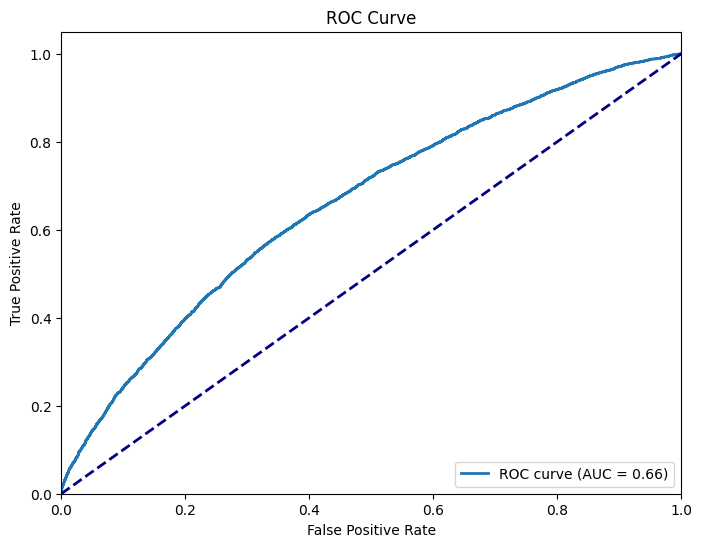

In [ ]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(
    max_depth=7,               # Increased tree depth for better learning
    learning_rate=0.05,        # Reduced learning rate for better generalization
    n_estimators=150,          # Increased boosting rounds for more robust learning
    subsample=0.9,             # Increased subsample to use more data for each tree
    colsample_bytree=0.9,      # Increased feature subsampling for more diversity
    scale_pos_weight=5,        # Adjusted scale_pos_weight to handle class imbalance better
    random_state=42,           # Ensure reproducibility
    n_jobs=-1,                 # Use all available CPU cores for faster training
    eval_metric='logloss'      # Set eval_metric to logloss for better monitoring during training
)

# Use the evaluate_model function directly
evaluate_model(xgb_model, X_train_smote, y_train_smote, X_test, y_test, model_name="XGB Classifier")

# Plot the ROC curve using your existing function
plot_roc_curve(xgb_model, X_test, y_test)

**Performance Summary:**

*Accuracy*: High overall accuracy indicates the model predicts correctly for most cases.

*Recall for Readmissions*: The model struggles to identify actual readmitted patients, missing most of them.

*Precision for Readmissions*: Only about a quarter of the predictions for "readmitted" are correct.

**Confusion Matrix:**

For *Non-Readmitted Patients*: Most are correctly identified as non-readmitted, with very few false positives.

For *Readmitted Patients*: The model misses most actual readmissions and a small fraction is correctly predicted as readmitted

Some good things about this model is that it high accuracy with stable performance across training, testing, and cross-validation.Additionally, it has excellent recall for non-readmitted patients, ensuring most negatives are identified correctly.
Some drawbacks of the model is its precision for readmissions is low, leading to many false positives for the minority class.
The model focuses heavily on the majority class, reducing its ability to differentiate minority class instances.


The XGBoost model is excellent at predicting non-readmitted patients but struggles significantly with the minority class (readmissions).


---



**Model 4: Random Forest Classifier**

Tried hyperparameter tuning but removed it as it takes long time to process

Random Forest Classifier:
Training Accuracy: 0.9284775305516335
Testing Accuracy: 0.8855589488874719
Cross validation score 0.9261085682642616
Confusion Matrix (Test):
[[26371    22]
 [ 3388    16]]
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26393
           1       0.42      0.00      0.01      3404

    accuracy                           0.89     29797
   macro avg       0.65      0.50      0.47     29797
weighted avg       0.83      0.89      0.83     29797



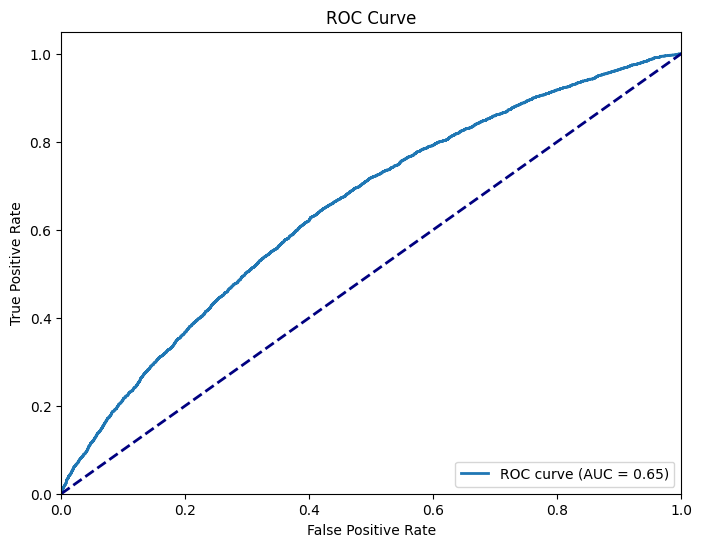

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=300,           # Number of trees in the forest
    max_depth=15,               # Maximum depth of the trees
    min_samples_split=10,       # Minimum number of samples to split a node
    min_samples_leaf=5,         # Minimum samples required to be at a leaf node
    max_features='sqrt',        # Use square root of the total features for better splits
    class_weight='balanced',    # Adjust class weights to handle imbalance
    random_state=42,            # Ensure reproducibility
    n_jobs=-1                   # Use all available CPU cores for faster training
)

# Evaluate the model using the evaluate_model function
evaluate_model(rf_model, X_train_smote, y_train_smote, X_test, y_test, model_name="Random Forest Classifier")

# Plot the ROC curve for the model using the existing function
plot_roc_curve(rf_model, X_test, y_test)


**Performance Summary:**
*Accuracy*: This indicates that the model is performing well on the training data and generalizing fairly well to the test data, with only a slight difference between training and testing accuracy, suggesting that there is no significant overfitting.

*Recall for Readmissions* : The recall for readmissions is extremely low. This means the model is failing to identify almost all instances of readmissions.

*Precision for Readmissions* : The predictions model made for readmissions, only 48% were actually correct.

**Confusion Matrix:**

True Negatives (TN): 26,371 instances were correctly classified as non-readmissions.

False Positives (FP): 22 instances were incorrectly predicted as readmissions when they were actually non-readmissions.

False Negatives (FN): 3,388 instances were incorrectly predicted as non-readmissions when they were actually readmissions.

True Positives (TP): Only 16 instances were correctly predicted as readmissions.


Some good things about this model is the high overall accuracy, meaning the model is accurately identifying non-readmissions. The model has only 22 false positives for readmissions, meaning it's making very few mistakes when predicting non-readmission cases as readmissions.

---

**Evaluation Comparison**

In [ ]:
scores

,Model_Name,Test_Accuracy,Test_f1,Test_precision,Test_recall,Test_auc_roc
0,Logistic Regression,0.643890,0.251323,0.165382,0.523208,0.591332
1,Decision Tree Classifier,0.851965,0.177819,0.243243,0.140129,0.541951
2,XGB Classifier,0.766721,0.266075,0.207681,0.370153,0.594011
3,Random Forest Classifier,0.885559,0.009297,0.421053,0.004700,0.501933


As it can be seen from the results, XGBoost Classifier is evaluated as the best model due to balanced performance across all the metrics. Its accuracy stands around the moderate value of 76.67% but its recall of 37% stands out well above the other models suggesting that it has a better identification of patients who are readmitted. Also, with the precision of 20% and F1 score of 0.26, it has a fairly good trade off in the miss rate and false alarm rate as compared to the Decision Tree and Random Forest models which had very poor recall and were biased. Logistic Regression has the best recall of 52 percent and it can be good in situations requiring high sensitivity with its weak precision and accuracy. In contrast, XGBoost had a robust strategy and has room for improvement through better tuning and therefore is most suited type of model.